# **Computational Drug Discovery - Regression Models with Random Forest Part 04**

khalid El Akri

[*'Chem Code Professor' YouTube channel*](http://youtube.com/@chemcodeprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 04**, we will be building a regression model of coronavirus inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [4]:
df = pd.read_csv('bioa_data_preprocessed1_pIC50_pubchem_fp.csv')

In [5]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.142668
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.026872
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.974694
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.995679
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.939302
131,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.970616


## **3. Input features**
The ***coronavirus*** data set contains 882 input features and 1 output variable (pIC50 values).

### **3.2. Output features**

In [6]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y = df.pIC50
Y

0      5.142668
1      5.026872
2      4.869666
3      4.882397
4      5.698970
         ...   
128    4.974694
129    4.995679
130    4.939302
131    4.970616
132    4.102923
Name: pIC50, Length: 133, dtype: float64

### **3.3. Let's examine the data dimension**

In [8]:
X.shape

(133, 881)

In [9]:
Y.shape

(133,)

### **3.4. Remove low variance features**

In [10]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [11]:
X.shape

(133, 200)

## **4. Data split (80/20 ratio)**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
X_train.shape, Y_train.shape

((106, 200), (106,))

In [14]:
X_test.shape, Y_test.shape

((27, 200), (27,))

## **5. Building a Regression Model using Random Forest**

In [15]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5339626375380137

In [16]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

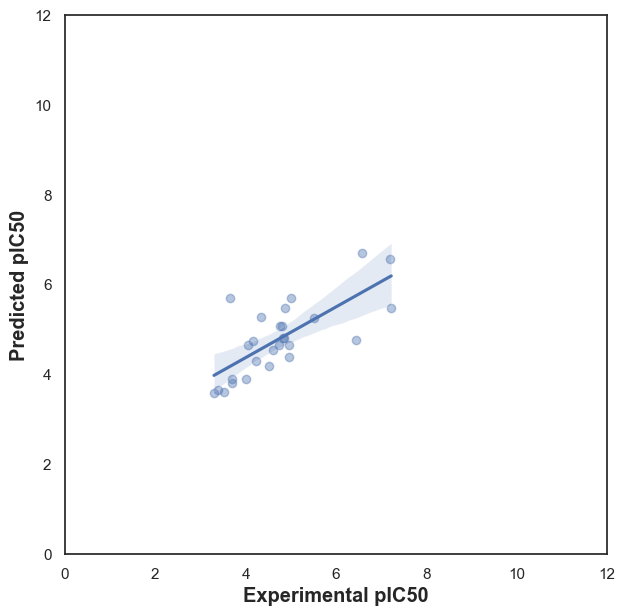

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(7, 7)
plt.show